# KE5205 Text Mining - Continual Assessment

## Load libraries

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import os
import re
import collections
import pandas.tseries

## Load data

In [2]:
jobs_data_df = pd.read_excel(os.path.join('data', 'Results.xlsx'))
jobs_data_df.iloc[:5, :5]

,jobpost,date,Title,Company,AnnouncementCode
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN


In [3]:
jobs_data_df.iloc[-5:, :5]

,jobpost,date,Title,Company,AnnouncementCode
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN
19000,"""Kamurj"" UCO CJSC\r\n\r\n\r\nTITLE: Lawyer in...","Dec 30, 2015",Lawyer in Legal Department,"""Kamurj"" UCO CJSC",NaN


## Explore data

In [4]:
jobs_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16474 non-null object
RequiredQual        18510 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
AboutC              12470 non-null object
Year                19001 non-null int64
Month               19001 non-null int64
IT                

### Check, convert the date / time

In [5]:
jobs_data_df.loc[:, ['date', 'year', 'month']].head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,date,year,month
0,"Jan 5, 2004",NaN,NaN
1,"Jan 7, 2004",NaN,NaN
2,"Jan 7, 2004",NaN,NaN
3,"Jan 7, 2004",NaN,NaN
4,"Jan 10, 2004",NaN,NaN


In [6]:
jobs_data_df['date'][0]

'Jan 5, 2004'

In [7]:
type(jobs_data_df['date'][0])

str

In [8]:
pd.to_datetime(jobs_data_df['date'][:20].tolist())

DatetimeIndex(['2004-01-05', '2004-01-07', '2004-01-07', '2004-01-07',
               '2004-01-10', '2004-01-10', '2004-01-11', '2004-01-13',
               '2004-01-13', '2004-01-13', '2004-01-13', '2004-01-13',
               '2004-01-13', '2004-01-14', '2004-01-14', '2004-01-15',
               '2004-01-15', '2004-01-15', '2004-01-16', '2004-01-16'],
              dtype='datetime64[ns]', freq=None)

In [9]:
jobs_data_df['date_time'] = pd.to_datetime(jobs_data_df['date'])
jobs_data_df['date_time'].describe()

count                   19001
unique                   4365
top       2012-03-01 00:00:00
freq                       27
first     1930-01-01 00:00:00
last      2029-06-01 23:34:00
Name: date_time, dtype: object

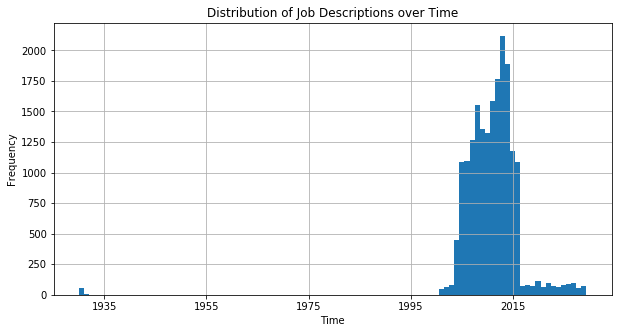

In [43]:
plt.figure(figsize=(10, 5))
jobs_data_df['date_time'].hist(bins=100)
plt.title('Distribution of Job Descriptions over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [11]:
len(jobs_data_df.loc[jobs_data_df['date_time'] > '2018-10-01', 'date_time'])

858

In [12]:
jobs_data_df.loc[jobs_data_df['date_time'] > '2018-10-01', 'date_time'].value_counts()

2022-05-01 00:00:00    17
2020-01-01 00:00:00    16
2029-05-01 00:00:00    16
2025-02-01 00:00:00    15
2026-03-01 00:00:00    13
2022-01-01 00:00:00    13
2025-05-01 00:00:00    13
2021-01-01 00:00:00    12
2027-03-01 00:00:00    12
2025-03-01 00:00:00    11
2024-03-01 00:00:00     9
2026-02-01 00:00:00     9
2027-04-01 00:00:00     9
2023-01-01 00:00:00     9
2020-03-01 00:00:00     8
2020-05-01 00:00:00     8
2023-03-01 00:00:00     7
2027-05-01 00:00:00     7
2019-03-01 00:00:00     7
2026-01-01 00:00:00     7
2020-02-01 00:00:00     7
2019-05-01 00:00:00     7
2029-01-01 00:00:00     6
2028-04-01 00:00:00     6
2022-04-01 00:00:00     6
2027-02-01 00:00:00     6
2021-04-01 00:00:00     5
2023-02-01 00:00:00     5
2027-01-01 00:00:00     5
2021-05-01 00:00:00     5
                       ..
2020-06-01 05:40:00     1
2028-06-01 06:55:00     1
2020-06-01 01:58:00     1
2025-06-01 05:43:00     1
2019-06-01 08:12:00     1
2021-06-01 22:11:00     1
2023-06-01 06:25:00     1
2027-06-01 0

In [13]:
new_jobs_data_df = jobs_data_df[jobs_data_df['date_time'] < '2018-10-01']
len(new_jobs_data_df)

18143

In [14]:
new_jobs_data_df = new_jobs_data_df[new_jobs_data_df['date_time'] > '2004-01-01']
len(new_jobs_data_df)

17897

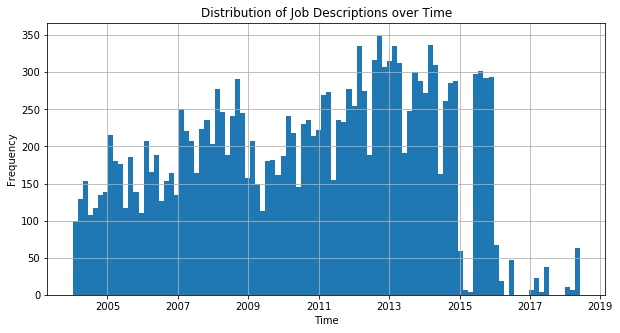

In [42]:
plt.figure(figsize=(10, 5))
new_jobs_data_df['date_time'].hist(bins=100)
plt.title('Distribution of Job Descriptions over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### Check which skills are most asked for

In [16]:
jobs_data_df['skillParsed'].head(10)

0                                 ['finance/ banking']
1                ['spoken', 'translation', 'speaking']
2                             ['environmental issues']
3    ['behavior-centered programming sm', 'behavior...
4         ['windows', 'database software development']
5                ['communication', 'english ( oral )']
6             ['software programs', 'ias', 'learning']
7                                                  NaN
8                                           ['french']
9    ['program administration', 'level iv', 'armeni...
Name: skillParsed, dtype: object

In [17]:
type(jobs_data_df['skillParsed'][0])

str

In [18]:
re.findall(r"(?<=\').*?(?=\')", jobs_data_df['skillParsed'][1])

['spoken', ', ', 'translation', ', ', 'speaking']

In [19]:
all_skills = []

#for i in range(len(jobs_data_df)):
for i in range(10):
    if pd.notna(jobs_data_df['skillParsed'][i]):
        these_skills = re.findall(r"(?<=\').*?(?=\')", jobs_data_df['skillParsed'][i])
        these_skills = [ a_skill for a_skill in these_skills if not a_skill.startswith(',') ]
        all_skills += these_skills
        # for j in skills:
        #     if not j.startswith(','):
        #         all_skills.append(j)
        
all_skills

['finance/ banking',
 'spoken',
 'translation',
 'speaking',
 'environmental issues',
 'behavior-centered programming sm',
 'behavior change',
 'facilitation',
 'pc-based software',
 'windows',
 'database software development',
 'communication',
 'english ( oral )',
 'software programs',
 'ias',
 'learning',
 'french',
 'program administration',
 'level iv',
 'armenian criminal justice system']

In [20]:
all_skills = []

for i in range(len(jobs_data_df)):
    if pd.notna(jobs_data_df['skillParsed'][i]):
        these_skills = re.findall(r"(?<=\').*?(?=\')", jobs_data_df['skillParsed'][i])
        these_skills = [ a_skill for a_skill in these_skills if not a_skill.startswith(',') ]
        all_skills += these_skills

In [21]:
len(all_skills)

72779

In [22]:
skill_counts = collections.Counter(all_skills)

In [23]:
skill_counts.most_common()[:10]

[('communication', 5346),
 ('english language', 3340),
 ('computer', 3304),
 ('presentation', 1002),
 ('negotiation', 924),
 ('written communication', 754),
 ('russian language', 664),
 ('travel', 590),
 ('management', 556),
 ('language', 536)]

In [24]:
list(skill_counts)[:5]

['finance/ banking',
 'spoken',
 'translation',
 'speaking',
 'environmental issues']

In [25]:
list(skill_counts)[0]

'finance/ banking'

### Look for some common technical skills

In [26]:
desired_skills = ['java', 'c++', 'python', 'php', 'linux', 'win', 'mac']

def is_desired(a_skill, skills_list):
    desired = False
    for i in skills_list:
        if i in a_skill:
            desired = True
            break
    return desired

[ i for i in list(skill_counts) if is_desired(i, desired_skills) ][:20]

['windows',
 'macromedia freehand',
 'j2ee java software development',
 'javascript',
 'macedonian and/or albanian',
 'linux',
 'c++ programming',
 'java',
 'win',
 'year java web development',
 'php',
 'unix/linux system administration',
 'c++',
 'unix/linux operating system',
 'structured java',
 'linux environment',
 'windows platform technologies',
 'linux system administration',
 'macromedia flash',
 'linux shell language']

In [27]:
# desired_skills = ['data']
# 
# def is_desired(a_skill, skills_list):
#     desired = False
#     for i in skills_list:
#         if i in a_skill:
#             desired = True
#             break
#     return desired
# 
# [ i for i in list(skill_counts) if is_desired(i, desired_skills)][:20]

In [28]:
def is_type_of_skill(a_skill, skills_list):
    desired = False
    type = None
    for i in skills_list:
        if i in a_skill:
            desired = True
            type = i
            break
    return desired, type

all_skill_types = []
for i in list(skill_counts):
    is_a_skill, skill_type = is_type_of_skill(i, desired_skills)
    if is_a_skill:
        all_skill_types.append(skill_type)
        

In [29]:
skill_type_counts = collections.Counter(all_skill_types)
skill_type_counts

Counter({'c++': 47,
         'java': 103,
         'linux': 105,
         'mac': 48,
         'php': 41,
         'python': 6,
         'win': 65})

### Aggregate the job requirements by month

In [30]:
new_jobs_data_df['mth'] = new_jobs_data_df['date_time'].apply(lambda x: pd.Timestamp(year=x.year,
                                                                               month=x.month,
                                                                               day=1, hour=0))

In [31]:
new_jobs_data_df[['date_time','mth']].head()

,date_time,mth
0,2004-01-05,2004-01-01
1,2004-01-07,2004-01-01
2,2004-01-07,2004-01-01
3,2004-01-07,2004-01-01
4,2004-01-10,2004-01-01


In [32]:
for a_skill in desired_skills:
    new_jobs_data_df[a_skill] = new_jobs_data_df['skillParsed'].apply(lambda x, y: True if not pd.isnull(x) and y in x else False, y=a_skill)

In [33]:
new_jobs_data_df[['mth'] + desired_skills].head()

,mth,java,c++,python,php,linux,win,mac
0,2004-01-01,False,False,False,False,False,False,False
1,2004-01-01,False,False,False,False,False,False,False
2,2004-01-01,False,False,False,False,False,False,False
3,2004-01-01,False,False,False,False,False,False,False
4,2004-01-01,False,False,False,False,False,True,False


In [34]:
new_jobs_data_df['java'].value_counts()

False    17279
True       618
Name: java, dtype: int64

In [35]:
df = new_jobs_data_df[['mth', 'java']].copy()
df = df[df['java']]
grouped = df.groupby('mth')
grouped.count().head(10)

,java
mth,
2004-02-01,1
2004-03-01,1
2004-04-01,1
2004-05-01,2
2004-06-01,3
2004-07-01,5
2004-08-01,1
2004-09-01,1
2004-11-01,5


In [36]:
df = new_jobs_data_df[['mth', 'mac']].copy()
df = df[df['mac']]
grouped = df.groupby('mth')
grouped.count().head(10)

,mac
mth,
2004-01-01,1
2004-03-01,1
2004-06-01,1
2004-10-01,2
2004-12-01,2
2005-01-01,2
2005-02-01,5
2005-03-01,2
2005-04-01,1


In [37]:
all_months = pd.date_range('2004-01', '2018-11', freq='MS')
skills_df_list = []
for a_skill in desired_skills:
    df = new_jobs_data_df[['mth', a_skill]].copy()
    df = df[df[a_skill]]
    grouped = df.groupby('mth').count()
    grouped = grouped.reindex(all_months)
    skills_df_list.append(grouped)    

In [38]:
skills_df_list[1].head()

,c++
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,2.0
2004-05-01,NaN


In [39]:
trend_df = pd.concat(skills_df_list, axis=1)
trend_df.head()

,java,c++,python,php,linux,win,mac
2004-01-01,NaN,NaN,NaN,NaN,NaN,3.0,1.0
2004-02-01,1.0,NaN,NaN,NaN,1.0,1.0,NaN
2004-03-01,1.0,NaN,NaN,NaN,NaN,1.0,1.0
2004-04-01,1.0,2.0,NaN,NaN,6.0,NaN,NaN
2004-05-01,2.0,NaN,NaN,2.0,1.0,1.0,NaN


## Plot the trend by Month

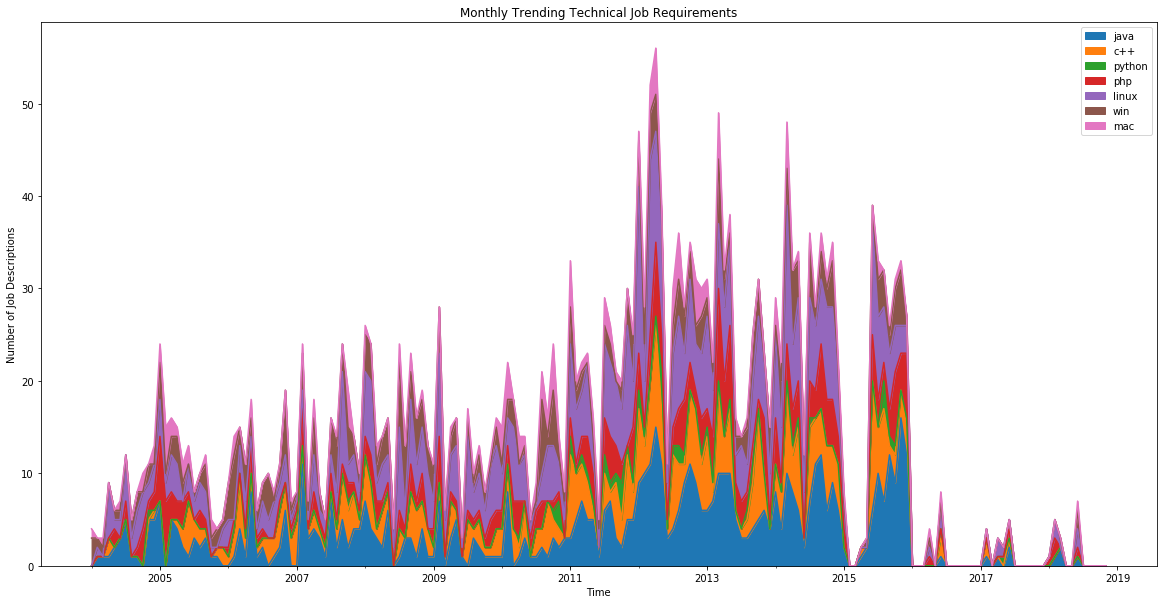

In [41]:
trend_df.plot.area(figsize=(20, 10))
plt.title('Monthly Trending Technical Job Requirements')
plt.ylabel('Number of Job Descriptions')
plt.xlabel('Time')
plt.show()

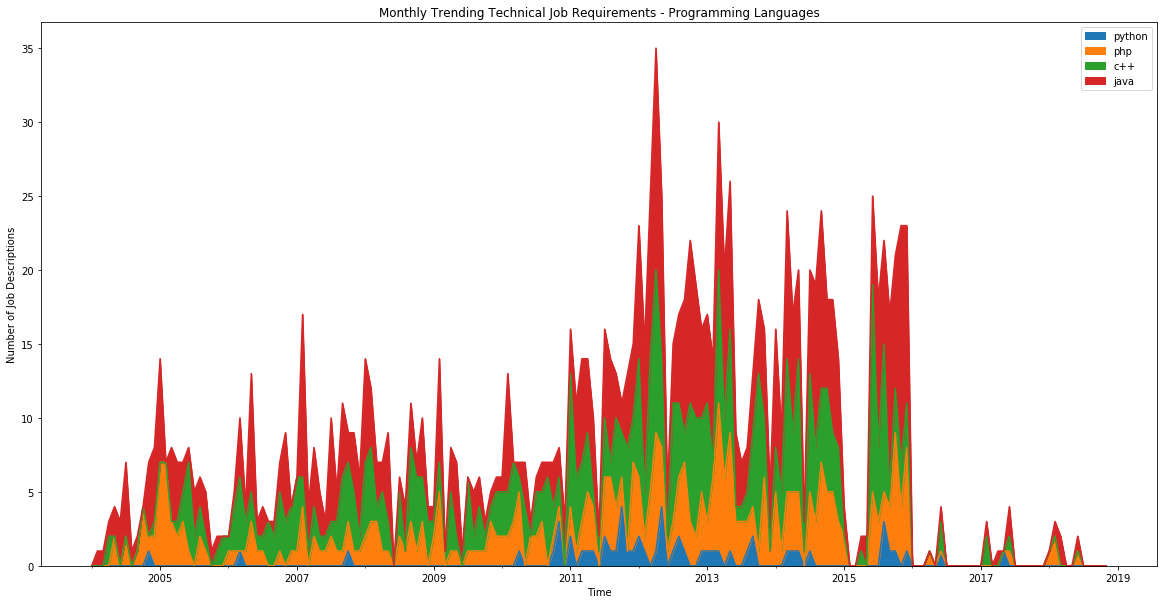

In [49]:
trend_df[['python', 'php', 'c++', 'java']].plot.area(figsize=(20, 10))
plt.title('Monthly Trending Technical Job Requirements - Programming Languages')
plt.ylabel('Number of Job Descriptions')
plt.xlabel('Time')
plt.show()

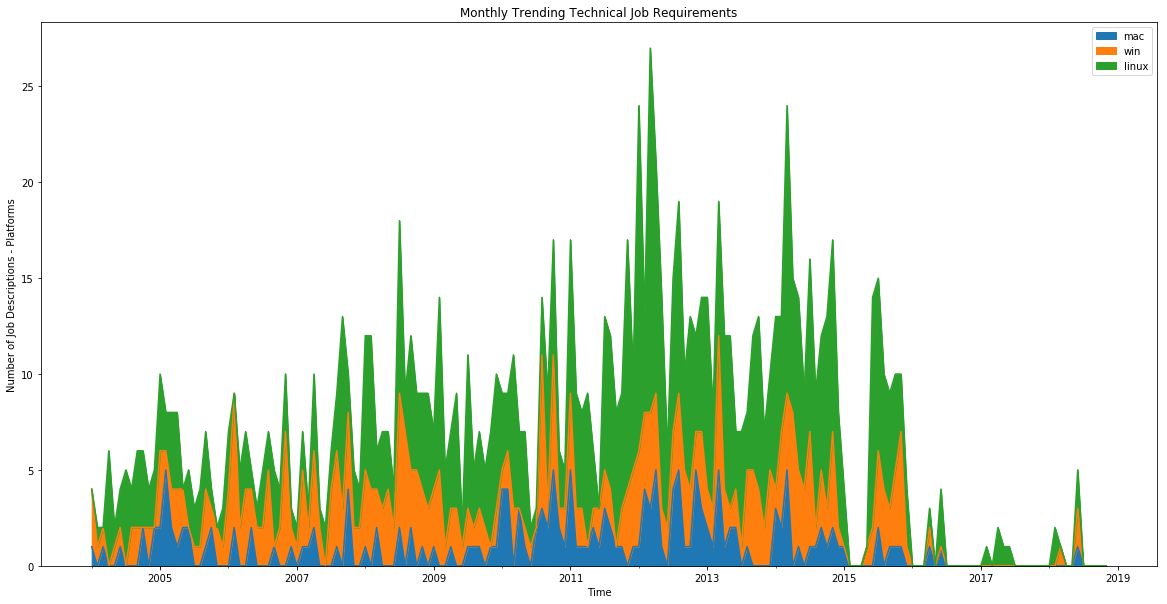

In [47]:
trend_df[['mac', 'win', 'linux']].plot.area(figsize=(20, 10))
plt.title('Monthly Trending Technical Job Requirements')
plt.ylabel('Number of Job Descriptions - Platforms')
plt.xlabel('Time')
plt.show()

### Plot the trend by Quarter

In [77]:
new_jobs_data_df['quarter'] = new_jobs_data_df['date_time'] + pd.tseries.offsets.DateOffset(days=1) - pd.tseries.offsets.QuarterBegin()

In [78]:

new_jobs_data_df[['date_time', 'quarter']][90:110]

,date_time,quarter
90,2004-02-24,2003-12-01
91,2004-02-28,2003-12-01
92,2004-02-28,2003-12-01
93,2004-02-28,2003-12-01
94,2004-02-28,2003-12-01
95,2004-02-28,2003-12-01
96,2004-02-28,2003-12-01
97,2004-02-28,2003-12-01
98,2004-02-29,2003-12-01
99,2004-03-01,2004-03-01


In [81]:
all_quart = pd.date_range('2004-01', '2018-11', freq='QS-DEC')
skills_df_list = []
for a_skill in desired_skills:
    df = new_jobs_data_df[['quarter', a_skill]].copy()
    df = df[df[a_skill]]
    grouped = df.groupby('quarter').count()
    grouped = grouped.reindex(all_quart)
    skills_df_list.append(grouped)    

In [82]:
skills_df_list[0].head()

,java
2004-03-01,4.0
2004-06-01,6.0
2004-09-01,6.0
2004-12-01,12.0
2005-03-01,11.0


In [83]:
trend_quart_df = pd.concat(skills_df_list, axis=1)
trend_quart_df.head(20)

,java,c++,python,php,linux,win,mac
2004-03-01,4.0,2.0,NaN,2.0,7.0,2.0,1.0
2004-06-01,6.0,NaN,NaN,2.0,7.0,2.0,NaN
2004-09-01,6.0,NaN,1.0,6.0,10.0,4.0,2.0
2004-12-01,12.0,1.0,NaN,16.0,9.0,5.0,9.0
2005-03-01,11.0,3.0,NaN,8.0,8.0,7.0,5.0
2005-06-01,5.0,4.0,NaN,2.0,5.0,2.0,NaN
2005-09-01,5.0,2.0,NaN,1.0,4.0,6.0,3.0
2005-12-01,1.0,6.0,NaN,2.0,5.0,12.0,2.0
2006-03-01,13.0,9.0,1.0,4.0,7.0,8.0,2.0
2006-06-01,2.0,4.0,NaN,1.0,5.0,7.0,NaN


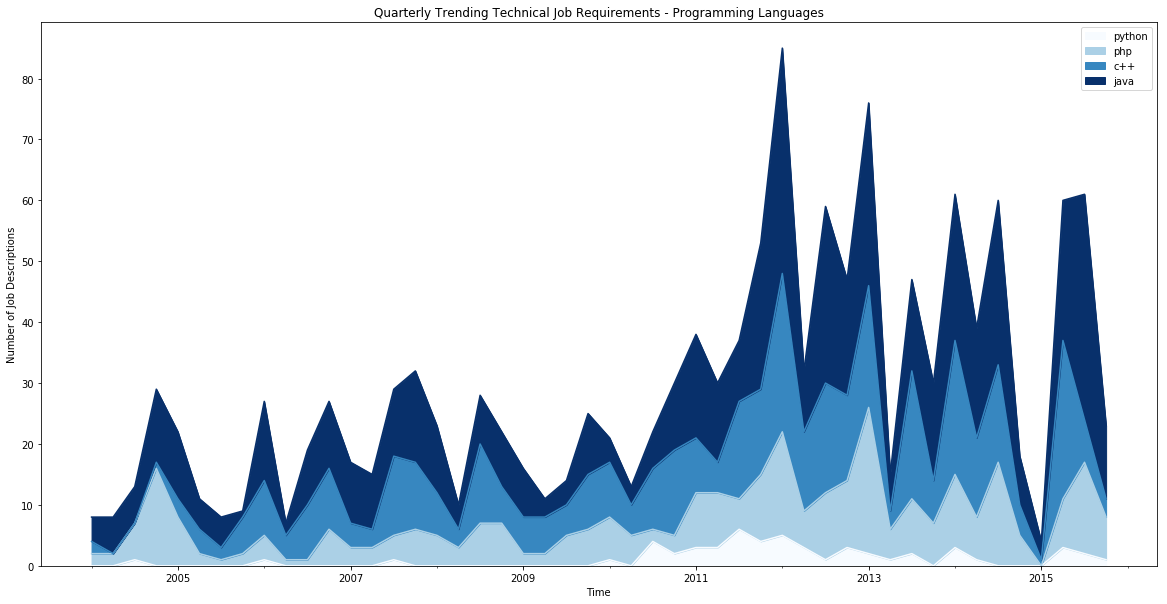

In [90]:
trend_quart_df.loc['2004-01':'2015-12', ['python', 'php', 'c++', 'java']].plot.area(figsize=(20, 10), colormap='Blues')
plt.title('Quarterly Trending Technical Job Requirements - Programming Languages')
plt.ylabel('Number of Job Descriptions')
plt.xlabel('Time')
plt.show()

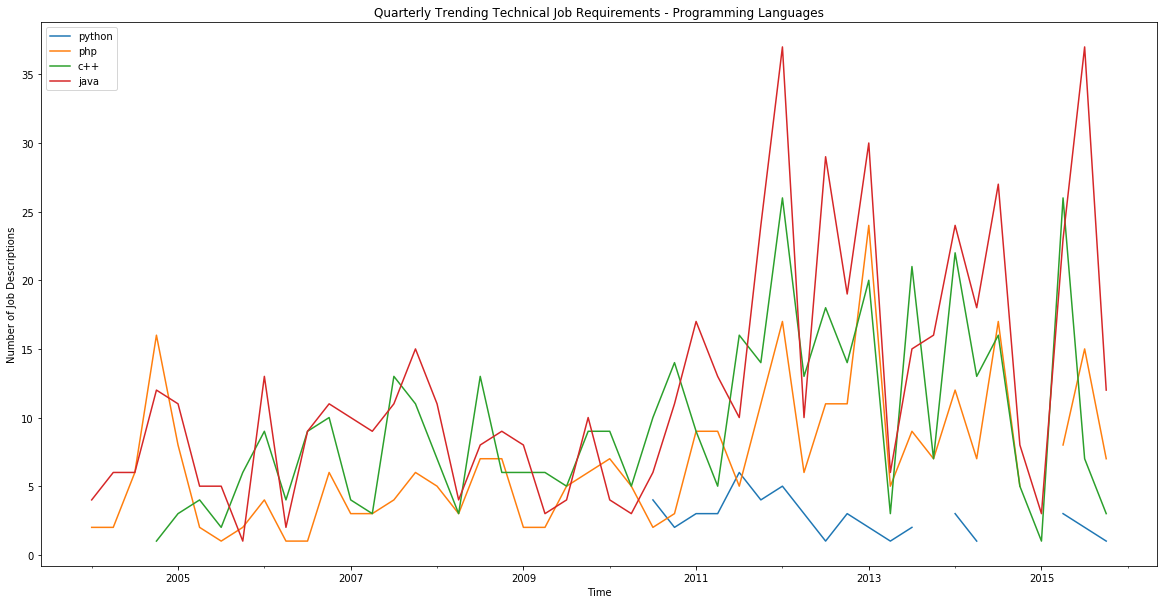

In [87]:
trend_quart_df.loc['2004-01':'2015-12', ['python', 'php', 'c++', 'java']].plot(figsize=(20, 10))
plt.title('Quarterly Trending Technical Job Requirements - Programming Languages')
plt.ylabel('Number of Job Descriptions')
plt.xlabel('Time')
plt.show()

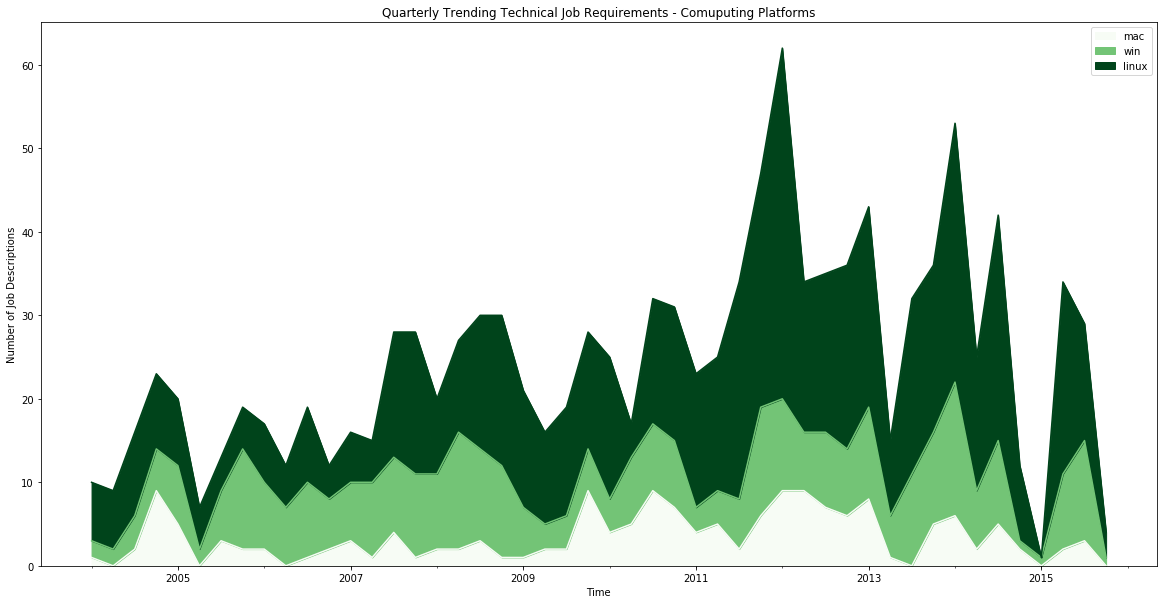

In [91]:
trend_quart_df.loc['2004-01':'2015-12', ['mac', 'win', 'linux']].plot.area(figsize=(20, 10), colormap='Greens')
plt.title('Quarterly Trending Technical Job Requirements - Comuputing Platforms')
plt.ylabel('Number of Job Descriptions')
plt.xlabel('Time')
plt.show()

## Plot the trend by percentage